In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [13]:
df = pd.read_csv('Breast_cancer.csv')

In [14]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [15]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [16]:
scaler = MinMaxScaler()
df = pd.DataFrame(data=scaler.fit_transform(df), columns=df.columns)
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.0


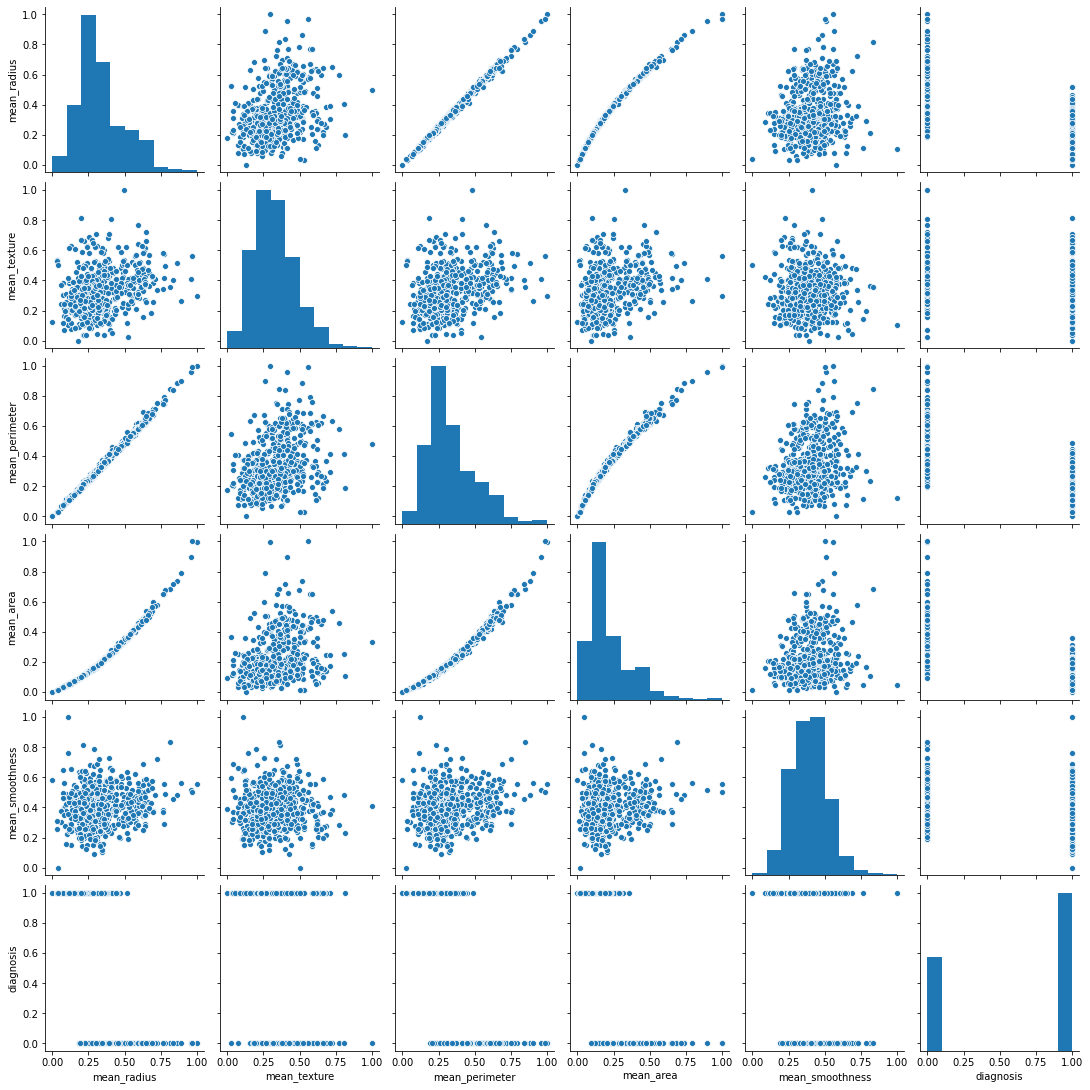

In [17]:
sns.pairplot(data=df)

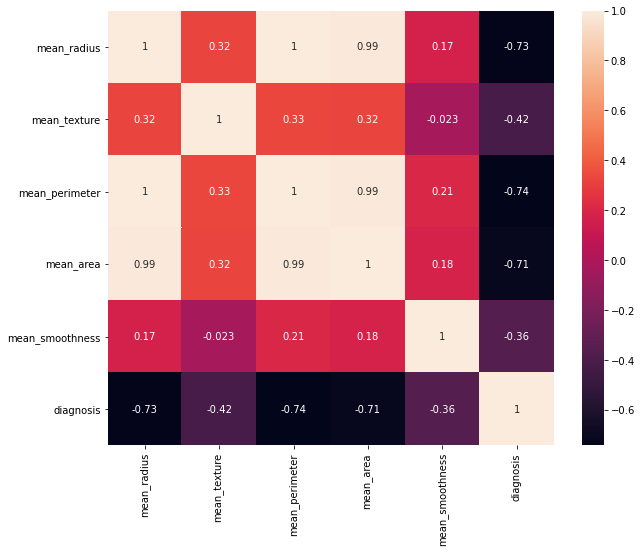

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

In [19]:
target = df.diagnosis
features = df.drop(columns=["diagnosis"])

# Removing multi-colilinearity using VIF


In [20]:
while True:
    temp_var = 0
    temp_col = ""
    for i in range(features.shape[1]):
        if variance_inflation_factor(features.values, i) > temp_var:
            temp_col = features.columns[i]
            temp_var = variance_inflation_factor(features.values, i)
    if temp_var > 5:
        print("Dropping feature '{}' which has a VIF value: {}\n".format(temp_col, temp_var))
        features.drop(columns=[temp_col], inplace=True)
    else:
        break
        
print("Final Features with VIF <=5:")
for i in range(features.shape[1]):
    print(features.columns[i], variance_inflation_factor(features.values, i))

Dropping feature 'mean_perimeter' which has a VIF value: 1439.4732757854108

Dropping feature 'mean_radius' which has a VIF value: 109.1191388812625

Final Features with VIF <=5:
mean_texture 4.8266540340062765
mean_area 3.604446515753156
mean_smoothness 4.564524398390533


# Split data into train and test set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

# Classification Models

In [22]:
model_data = []
Models = [GradientBoostingClassifier(), DecisionTreeClassifier()]

for model in Models:
    classifier = model
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    model_data.append([model.__class__.__name__, roc_auc_score(y_test, y_pred)])
    
model_data_frame = pd.DataFrame(columns=["Model", "ROC_Score"], data=model_data)
print(model_data_frame.sort_values("ROC_Score"))

                        Model  ROC_Score
1      DecisionTreeClassifier   0.916143
0  GradientBoostingClassifier   0.940042


In [23]:
print("Confusion Matrix")
print(pd.DataFrame(data=confusion_matrix(y_test, y_pred), columns=["Predicted True", "Predicted False"], index=["Actual True", "Actual False"]))

Confusion Matrix
              Predicted True  Predicted False
Actual True               50                3
Actual False              10               80


Text(0.5, 1.0, 'ROC - AUC Curve')

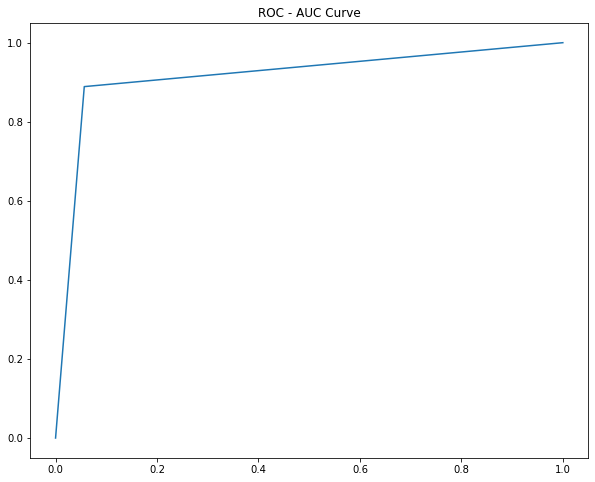

In [24]:
falsePositive, truePositive, threshold = roc_curve(y_test, y_pred, pos_label=1)
plt.figure(figsize=(10, 8))
sns.lineplot(falsePositive, truePositive)
plt.title("ROC - AUC Curve")